<a href="https://colab.research.google.com/github/mashyko/Python_samples/blob/main/economic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulations of Economic Models

The steady state level of the output is 2.221460888038906


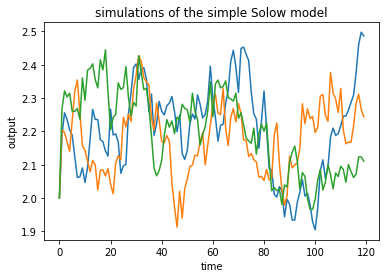

In [1]:
# This program shows the simulation results for the simple Solow model of economic growth.
'''
     the production function f(K)=A K^theta
     the expression for the technology shock = exp(epsilon_t): the standard error =volat
     the rate of population growth = n
     the depreciation rate = delta
     the saving rate = sigma
'''
from numpy import *
import matplotlib.pyplot as plt

# set up the parameters' value.
T=120
delta=0.1
A=1.0
sigma=0.2
n=0.02
theta=0.36
volat=0.2

# compute the steady state of the economy.
B=(1+theta*n-delta*(1-theta))/(1+n)
C=(delta+n)/(1+n)
X_ss=((n+delta)/(sigma*A))**(1/(theta-1))
print ('The steady state level of the output is', X_ss)

icase=3 # icase=the number of simulations 
K=zeros((icase,T))
X=zeros((icase,T))
k=zeros((icase,T))
R=zeros((icase,T))
for i in arange(icase):
    K[i,0]=2.0
    X[i,0]=2.0
    k[i,0]=0.0

# compute the trajectories of the economy given the exogenous shocks.
for i in arange(icase):
    for t in arange(T-1):
        R[i,t]=volat*random.randn(1)
        K[i,t+1]=((1-delta)*K[i,t]+sigma*A*exp(R[i,t])*K[i,t]**(theta))/(1+n)
        k[i,t+1]=B*k[i,t]+C*R[i,t]
        X[i,t+1]=X_ss*exp(k[i,t+1])

time=arange(0,T)

plt.title('simulations of the simple Solow model')
plt.plot(time, X[0,:],time,X[1,:],time, X[2,:])
plt.xlabel('time')
plt.ylabel('output')
plt.show()



Hbar = 0.3335092854743509
Kbar = 12.669768803213103
A= [[  0.       ]
 [-12.6697688]
 [  0.       ]
 [  0.       ]]
B= [[ 0.        ]
 [12.35302458]
 [ 0.36      ]
 [-1.        ]]
C= [[ 1.         -1.         -1.500396    0.        ]
 [ 1.23533801 -0.91859379  0.          0.        ]
 [-1.          0.          0.64        0.        ]
 [ 1.          0.          0.         -1.        ]]
D= [[0.]
 [0.]
 [1.]
 [0.]]
P= [0.95367389]
R= [[ 0.20446019]
 [ 0.56910286]
 [-0.24303095]
 [-0.79553981]]
Q= [0.11318305]
S= [[1.45228269]
 [0.39196528]
 [0.70669171]
 [1.45228269]]
The standard error ratios of the jump variables to the technology shock 
 are as follows:
Y_sigma= [5.6752477]
C_sigma= [4.07708821]
H_sigma= [1.7755454]
r_sigma= [3.74218213]


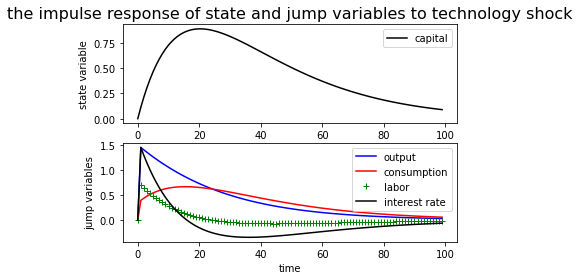

In [2]:
# This program shows the simulation results for the log-linearlized version of the basic RBC model
'''
  the utility function is u(c_t, h_t) = log c_t + A log(1 - h_t),
  the production function is f(k_t,h_t) = lamda_t k_t^theta h_t^(1-theta).
  This version includes the programs to find the stationary states
    and computes the matrices for the equilibrium law of motion 
      also, shows the graphs for the impulse response functions
        and computes the variance ratio of the state variables to technology shock
'''

theta=.36; delta=.025; beta=.99; gamma=0.95

from numpy import *
import matplotlib.pyplot as plt

def varratio(ax,bw,cx,dw,roe,tol):
  '''
 compute the ratio of the variance of a jump variables to the variance of  the shock.
 The interation limit is 1000.
 The dynamical system:x_(t+1)=a x_t + b w_t, y_t = c x_t + d w_t,
 shock is w_(t+1)=roe w_t + epsilon_t
 function name: varratio(a,b,c,d,roe,tol)
  '''
  vr=0
  for i in range(1000):
    shortsum=0
    if i == 1:
      shortsum=1
    else:
      for j in range(i+1):
        shortsum=shortsum+ax**(j-1)*roe**(i+1-j)
    increment=cx*bw*shortsum+dw*roe**i
    vr=vr+increment*increment
    if abs(increment)<tol:
      #print 'the iterations are ended when i=',i,'since increments < ',increment
      break
  vr=vr+dw*dw
  return vr

# compute the value of Hbar when A=1.72
a0=1.72
Hbar=(1-(beta*delta*theta)/(1-beta*(1-delta)))
Hbar=1/(1+a0*Hbar/(1-theta))
print ("Hbar =", Hbar)

# compute the value of kbar
f0=theta/(1/beta-(1-delta))
Kbar=Hbar*f0**(1/(1-theta))
print ("Kbar =", Kbar)

# set up the matrices necessary for the eqiulibrium law of motion
rbar=1/beta-(1-delta)
ybar=(Kbar**theta) * (Hbar**(1-theta))
cbar=ybar-delta*Kbar
A=array([[0.], [-Kbar], [0.],[0.]])
B=array([[0.], [(1-delta)*Kbar], [theta], [-1.]])
C=array([[1.,  -1.,  -1./(1-Hbar), 0.0],
            [ybar, -cbar, 0., 0.],
            [-1., 0., 1-theta, 0],
            [1., 0., 0., -1.]])
D=array([[0.], [0.], [1.], [0.]])
F=0.
G=F
H=F
J=array([0., -1., 0., beta*rbar])
K=array([0., 1., 0., 0.])
L=F
M=F
N=.95
print ("A=",A)
print ("B=",B)
print ("C=",C)
print ("D=",D)

# solve the Ricatti equation for P

Cinv=linalg.inv(C)
CinvA=dot(Cinv,A)
a = F-dot(J,CinvA)
CinvB=dot(Cinv,B)
b = -(dot(J,CinvB)-G + dot(K,CinvA))
c = -dot(K,CinvB)+H
P1 = (-b+sqrt(b**2-4*a*c))/(2*a)
P2 = (-b-sqrt(b**2-4*a*c))/(2*a)
if abs(P1)<1:
    P=P1
else:
    P=P2

print ("P=",P)
      
# the eqiulibrium law of motion is x(t)=Px(t-1)+Qw(t), y(t)=Rx(t-1)+Sw(t)
# x= capital(state variable)
# y=[output, consumption, labor, interest_rate](jump variables:non-predetermined)
# w is AR(1) process.

AP=A*P
CinvD=dot(Cinv,D)
R=-dot(Cinv,AP+B)
print ("R=",R)

JCinvA=dot(J,CinvA)
JCinvD=dot(J,CinvD)

Q=(JCinvD-L)*N + dot(K,CinvD)-M

QD=N*(F-JCinvA)+ F*P + G + dot(J,R)- dot(K,CinvA)
Q=Q/QD
print ("Q=", Q)
AQ=A*Q
S=-dot(Cinv, (AQ+D))
print ("S=", S)

# compute the impulse response function for the technology shock =1
# the eqiulibrium law of motion is x(t)=Px(t-1)+Qw(t), y(t)=Rx(t-1)+Sw(t), w(t) = N w(t-1) + shock(t)

runlgth=100
x=zeros(100)
y=zeros((4,100))
w=zeros(100)
wold=0.
shock=zeros(100)
shock[0]=1.
xold=0.

for i in range(100):
       w[i]=N*wold+shock[i]       
       x[i]=P*xold+Q*wold
       for j in range(4):
           y[j,i]=R[j]*xold + S[j]*wold

       xold=x[i]
       wold=w[i]
    
time=arange(0.,100,1.)
plt.subplot(2,1,1)
plt.plot(time, x,'k', label='capital')
plt.xlabel('time')
plt.ylabel('state variable')
plt.title('the impulse response of state and jump variables to technology shock',fontsize=16)
plt.legend()
plt.subplot(2,1,2)
plt.plot(time,y[0,:],'b',label='output')
plt.plot(time,y[1,:],'r',label='consumption')
plt.plot(time,y[2,:],'g+',label='labor')
plt.plot(time,y[3,:],'k',label='interest rate')
plt.xlabel('time')
plt.ylabel('jump variables')
plt.legend()


# compute the ratio of the variance of variable to the shock variance


print ('The standard error ratios of the jump variables to the technology shock \n are as follows:') 

vr=varratio(P,Q,R[0],S[0],gamma,0.1e-10)
std=sqrt(vr)
print ('Y_sigma=', std)
vr=varratio(P,Q,R[1],S[1],gamma,0.1e-10)
std=sqrt(vr)
print ('C_sigma=',std)
vr=varratio(P,Q,R[2],S[2],gamma,0.1e-10)
std=sqrt(vr)
print ('H_sigma=', std)
vr=varratio(P,Q,R[3],S[3],gamma,0.1e-10)
std=sqrt(vr)
print ('r_sigma=', std)

plt.show()
